In [60]:
import pandas as pd
import os,sys, gc
import matplotlib.pyplot as plt
from scipy.stats import entropy
sys.path.append("/home/fvalle/phd/master_thesis/")
sys.path.append("/home/fvalle/phd/master_thesis/hsbm/")
from hsbmpy import get_max_available_L

In [61]:
#label = 'disease_type'
algorithm = "topsbm"
directory='/home/fvalle/phd/datasets/gtex/log/10/'
L = get_max_available_L(directory, algorithm)
os.chdir(directory)

In [62]:
df_topics = pd.read_csv("%s/%s_level_%d_topic-dist.csv"%(algorithm,algorithm,L)).set_index('doc').drop('i_doc', axis=1)
df_words = pd.read_csv("%s/%s_level_%d_word-dist.csv"%(algorithm,algorithm,L), index_col=0)
df_words.index=[g[:15] for g in df_words.index]
df = pd.read_csv("mainTable.csv", index_col=0)
df = df.divide(df.sum(0),1).transpose().reindex(columns=df_words.index).fillna(0)
df_files=pd.read_csv("https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t', index_col=0)
df_topics.insert(0,'tissue', df_files.reindex(index=df_topics.index)['SMTS'])
df_topic_tissue = df_topics.groupby('tissue').mean()
df.head()

,ENSG00000268903,ENSG00000269981,ENSG00000250575,ENSG00000225972,ENSG00000229344,ENSG00000198744,ENSG00000205116,ENSG00000178821,ENSG00000233542,ENSG00000187730,...,ENSG00000210117,ENSG00000210127,ENSG00000210140,ENSG00000210144,ENSG00000210154,ENSG00000210156,ENSG00000210176,ENSG00000210191,ENSG00000210195,ENSG00000210196
GTEX-13NZA-0011-R5b-SM-5KM4K,0.000000,0.0,0.0,0.001088,0.001358,0.0,0.0,0.000107,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTEX-13QJC-0011-R6a-SM-5S2VI,0.000157,0.0,0.0,0.000577,0.000684,0.0,0.0,0.000088,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTEX-13QJC-0011-R10a-SM-5SI63,0.000000,0.0,0.0,0.000556,0.000636,0.0,0.0,0.000134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTEX-13OW8-0011-R6b-SM-5L3I3,0.000059,0.0,0.0,0.000642,0.000776,0.0,0.0,0.000182,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTEX-ZF28-0011-R11a-SM-4WWEI,0.000058,0.0,0.0,0.000829,0.001200,0.0,0.0,0.000469,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_Pst = pd.DataFrame(data=pd.np.matmul(df.values,df_words.values), index= df.index, columns=df_words.columns)
df_Pst = df_Pst.divide(df_Pst.sum(1), 0)
predictions = pd.np.array(list(map(lambda x: list(map(lambda y: entropy(x, y), df_topic_tissue.astype(float).values)), df_Pst.astype(float).values)))

df_Pst.insert(0,'tissue', df_files.reindex(index=df_Pst.index)['SMTS'])
reals = pd.np.unique(df_Pst.tissue, return_inverse=True)[1]

In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [65]:
accuracy_score(reals, pd.np.argmin(predictions, axis=1))

0.563

In [95]:
df_topics.groupby('tissue').var().transpose()

tissue,Adipose Tissue,Blood,Blood Vessel,Brain,Colon,Esophagus,Heart,Muscle,Skin,Thyroid
Topic 1,0.001573,8.383793e-04,0.003133,1.570433e-03,0.002986,0.011644,4.443544e-03,2.111433e-03,0.005868,4.485272e-03
Topic 2,0.000175,4.543142e-03,0.000139,2.094588e-05,0.000067,0.000095,1.546084e-04,4.215763e-05,0.000026,9.362060e-04
Topic 3,0.000026,2.837793e-05,0.000038,1.635220e-03,0.001045,0.000922,1.899502e-05,2.565508e-05,0.000166,1.501901e-05
Topic 4,0.000201,8.918289e-05,0.000347,2.688773e-05,0.000291,0.000900,6.359416e-03,5.165958e-03,0.000298,9.078326e-05
Topic 5,0.000017,9.038457e-06,0.000011,9.049877e-05,0.000020,0.000102,3.400210e-06,2.810529e-06,0.000032,5.220359e-05
Topic 6,0.000078,4.093391e-06,0.000149,3.087798e-06,0.000019,0.001128,3.907811e-05,9.232769e-06,0.005484,3.585422e-06
Topic 7,0.000181,7.025575e-06,0.000355,6.058517e-05,0.000093,0.000414,2.403374e-04,1.788605e-04,0.000628,1.021907e-04
Topic 8,0.000006,8.677627e-07,0.000018,6.916960e-05,0.000065,0.000037,8.619852e-04,3.564258e-05,0.000021,5.741518e-06
Topic 9,0.000207,1.342952e-02,0.000191,1.361146e-05,0.017702,0.000993,7.294684e-05,7.929649e-06,0.004291,4.156944e-04
Topic 10,0.000047,5.090702e-06,0.000039,7.245807e-06,0.000059,0.011885,9.881560e-07,7.071838e-07,0.012255,3.239342e-05


In [92]:
df_topic_tissue.transpose()

tissue,Adipose Tissue,Blood,Blood Vessel,Brain,Colon,Esophagus,Heart,Muscle,Skin,Thyroid
Topic 1,0.540747,0.488946,0.545028,0.242377,0.459622,0.423243,0.396615,0.209658,0.258201,0.450360
Topic 2,0.040111,0.148969,0.023330,0.012260,0.012814,0.018995,0.013853,0.010030,0.028969,0.151833
Topic 3,0.010354,0.003135,0.009896,0.325219,0.072639,0.042345,0.004192,0.004247,0.020964,0.004133
Topic 4,0.028936,0.009556,0.044826,0.022658,0.022602,0.033244,0.283485,0.641751,0.020523,0.023459
Topic 5,0.007212,0.005396,0.007406,0.081360,0.015988,0.016661,0.001308,0.001207,0.011793,0.028796
Topic 6,0.016188,0.001562,0.025670,0.001541,0.005509,0.023424,0.006781,0.002714,0.082839,0.001234
Topic 7,0.073828,0.010941,0.059612,0.026214,0.043069,0.076186,0.046931,0.035117,0.084377,0.036523
Topic 8,0.003152,0.002054,0.002518,0.060079,0.010692,0.006534,0.102345,0.030854,0.003158,0.002467
Topic 9,0.030156,0.123507,0.016129,0.006323,0.153755,0.039091,0.006724,0.002742,0.084324,0.061580
Topic 10,0.003953,0.002673,0.003347,0.007030,0.008984,0.094467,0.000374,0.000343,0.176165,0.015115


In [99]:
df_topics[df_topics.index.isin(df_files[df_files['SMTS']==tissue].index)].drop('tissue', 1).transpose().values.shape

(13, 100)

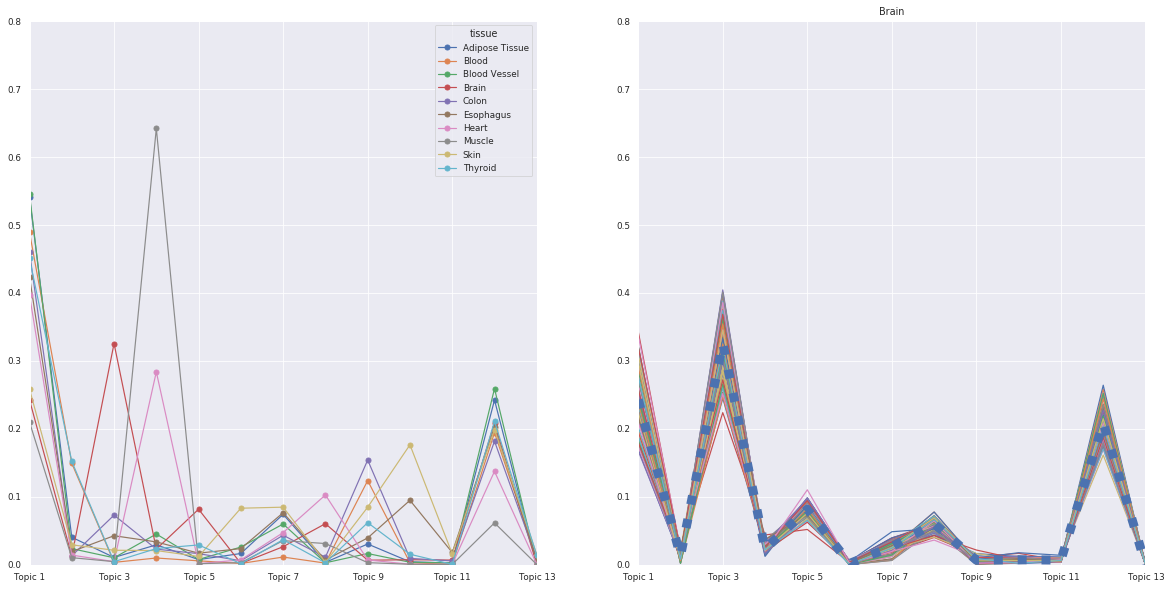

In [102]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
tissue='Brain'
df_topic_tissue.transpose().plot(ax=ax[0], marker='o', ms=5)
df_topics[df_topics.index.isin(df_files[df_files['SMTS']==tissue].index)].drop('tissue', 1).transpose().plot(ax=ax[1])
df_topics[df_topics.index.isin(df_files[df_files['SMTS']==tissue].index)].drop('tissue', 1).transpose().mean(1).plot(ax=ax[1], lw=9, ls=':')
ax[1].set_title(tissue)
#ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[0].set_ylim(0,0.8)
ax[1].set_ylim(0,0.8)
plt.show()

In [71]:
import pickle
from sbmtm import sbmtm

In [72]:
with open("topsbm.pkl", "rb") as f:
    model = pickle.load(f)

In [73]:
df_hsbm = pd.DataFrame(index=model.words, columns=model.documents).fillna(0)
for e, count in zip(model.g.get_edges(),model.g.properties[('e', 'count')].get_array()):
    df_hsbm.at[df_hsbm.index[e[1]-1000], df_hsbm.columns[e[0]]]=count
    if e[0]%100 ==0 and e[1]%1000==0:
        print(e)

[   0 2000]
[   0 3000]
[   0 5000]
[ 100 1000]
[ 100 2000]
[ 100 4000]
[ 100 5000]
[ 200 1000]
[ 200 2000]
[ 200 3000]
[ 200 4000]
[ 200 5000]
[ 300 1000]
[ 300 2000]
[ 300 3000]
[ 300 5000]
[ 400 1000]
[ 400 2000]
[ 400 3000]
[ 400 5000]
[ 500 2000]
[ 500 3000]
[ 600 2000]
[ 600 3000]
[ 600 5000]
[ 700 1000]
[ 700 2000]
[ 700 3000]
[ 700 5000]
[ 800 1000]
[ 800 2000]
[ 800 5000]
[ 900 1000]
[ 900 2000]
[ 900 3000]
[ 900 5000]


In [23]:
df_hsbm

,GTEX-13NZA-0011-R5b-SM-5KM4K,GTEX-13QJC-0011-R6a-SM-5S2VI,GTEX-13QJC-0011-R10a-SM-5SI63,GTEX-13OW8-0011-R6b-SM-5L3I3,GTEX-ZF28-0011-R11a-SM-4WWEI,GTEX-12WSE-0011-R1b-SM-5GU4V,GTEX-QMR6-0011-R11A-SM-32PKK,GTEX-11WQC-0011-R11b-SM-57WD6,GTEX-13FTY-0011-R9b-SM-5KM2U,GTEX-13CF2-0011-R11b-SM-5LZXO,...,GTEX-1EN7A-1026-SM-7IGPZ,GTEX-SIU8-0626-SM-2XCDN,GTEX-14E6C-2626-SM-5RQJP,GTEX-1122O-0226-SM-5N9DA,GTEX-13RTJ-0326-SM-5YYAE,GTEX-117XS-0526-SM-5987Q,GTEX-T8EM-0226-SM-3DB7C,GTEX-12WSE-1226-SM-73KUF,GTEX-13G51-1226-SM-5K7Z3,GTEX-14C5O-0826-SM-5TDEG
ENSG00000237683,0,0,1,1,0,0,1,0,0,2,...,3,3,3,3,3,3,3,2,4,3
ENSG00000268903,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,1,0,2,1
ENSG00000228463,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000225972,3,2,3,2,3,3,3,2,2,2,...,1,2,2,2,1,2,2,1,1,1
ENSG00000237973,5,4,4,5,5,4,4,6,4,4,...,3,3,4,5,2,3,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000025708,1,1,2,1,2,0,1,2,2,2,...,4,4,4,4,4,4,4,5,4,4
ENSG00000177989,0,0,0,0,1,0,2,2,2,2,...,4,4,3,3,3,4,3,4,3,4
ENSG00000205560,1,3,2,2,3,1,4,3,2,4,...,4,4,3,3,3,4,4,3,4,3
ENSG00000008735,2,4,4,3,4,4,5,4,3,5,...,0,1,0,0,1,1,0,0,0,0


In [26]:
df.reindex(index=df_hsbm.columns, columns=df_hsbm.index).transpose()

,GTEX-13NZA-0011-R5b-SM-5KM4K,GTEX-13QJC-0011-R6a-SM-5S2VI,GTEX-13QJC-0011-R10a-SM-5SI63,GTEX-13OW8-0011-R6b-SM-5L3I3,GTEX-ZF28-0011-R11a-SM-4WWEI,GTEX-12WSE-0011-R1b-SM-5GU4V,GTEX-QMR6-0011-R11A-SM-32PKK,GTEX-11WQC-0011-R11b-SM-57WD6,GTEX-13FTY-0011-R9b-SM-5KM2U,GTEX-13CF2-0011-R11b-SM-5LZXO,...,GTEX-1EN7A-1026-SM-7IGPZ,GTEX-SIU8-0626-SM-2XCDN,GTEX-14E6C-2626-SM-5RQJP,GTEX-1122O-0226-SM-5N9DA,GTEX-13RTJ-0326-SM-5YYAE,GTEX-117XS-0526-SM-5987Q,GTEX-T8EM-0226-SM-3DB7C,GTEX-12WSE-1226-SM-73KUF,GTEX-13G51-1226-SM-5K7Z3,GTEX-14C5O-0826-SM-5TDEG
ENSG00000237683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000268903,0.000000,0.000157,0.000000,0.000059,0.000058,0.000000,0.000052,0.000112,0.000168,0.000206,...,0.000069,0.000063,0.000271,0.000186,0.000179,0.000207,0.000305,0.000000,0.000313,0.000233
ENSG00000228463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000225972,0.001088,0.000577,0.000556,0.000642,0.000829,0.000594,0.000601,0.000551,0.000696,0.000427,...,0.000174,0.000341,0.000457,0.000394,0.000179,0.000363,0.000476,0.000177,0.000280,0.000305
ENSG00000237973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000025708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000177989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000205560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000008735,0.000722,0.000864,0.000858,0.000829,0.001036,0.000943,0.000877,0.000963,0.000714,0.000917,...,0.000136,0.000155,0.000125,0.000096,0.000256,0.000186,0.000115,0.000142,0.000110,0.000097


In [103]:
gc.collect()

14540